In [56]:
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mpl_lines
import numpy as np

%matplotlib widget

# code modified to change negative values to positive ones
def lmap(f,x):
    return list(map(f,x))

# code modified to change negative values to positive ones
def lfilter(f,x):
    return list(filter(f,x))

def loadCSV(path, x_id=0, y_id=1):
    with open(path) as inp:
        lines = inp.read().split("\n")[1:-2]
        rows = lmap(lambda l: lmap(float, l.strip().split(",")), lines)

        return {"x": lmap(lambda r: r[x_id], rows), "y": lmap(lambda r: r[y_id], rows)}

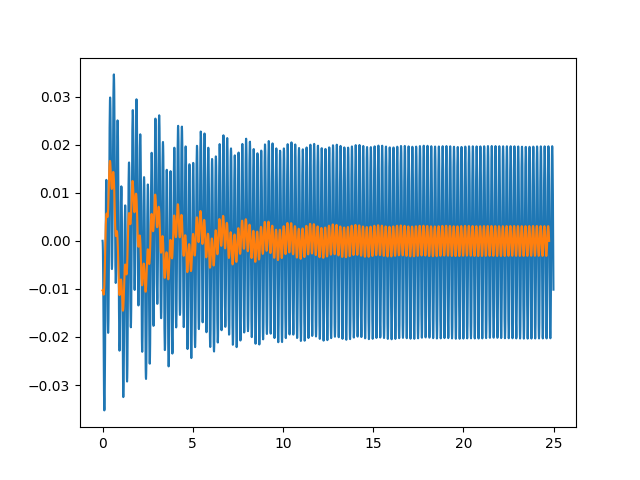

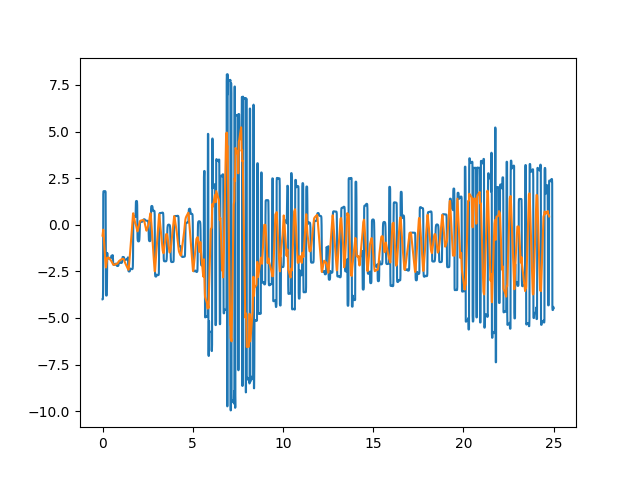

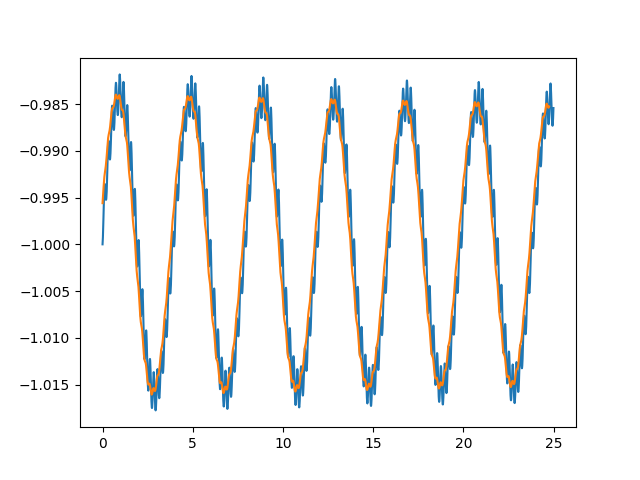

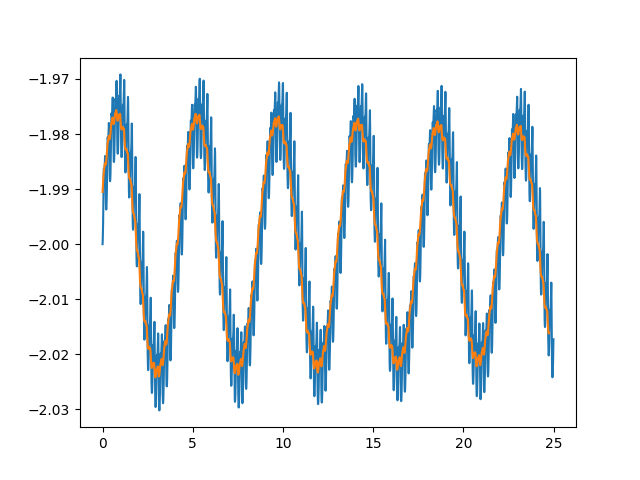

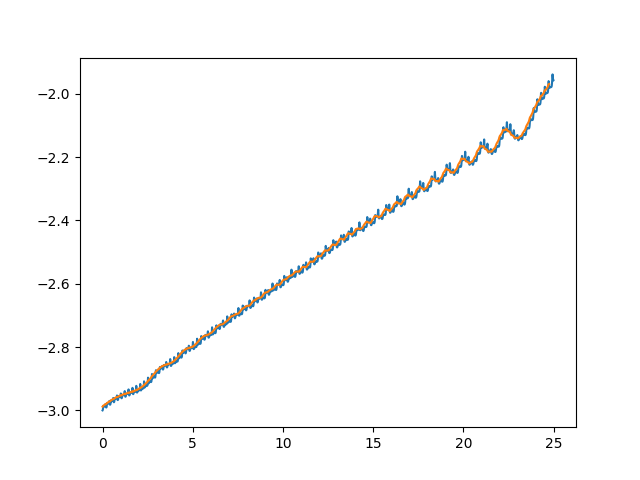

In [57]:
def eval_state(distance_cm, omega_driving, k_omegs, angle=0, time=25, do_plot=False):
    # print(f"./runs/d={d:.4f}_o={10:.2f}_k={k:.3f}_ang=${0.:.4f}_t=${25:.3f}.csv")
    
    dat = loadCSV(f"./runs/d={distance_cm:.4f}_o={omega_driving:.2f}_k={k_omegs:.3f}_ang={angle:.4f}_t={time:.3f}.csv")

    conv_len = 25
    dat_smooth = {
        "x": dat["x"][0: -conv_len + 1],
        "y": np.convolve(dat["y"], np.ones(conv_len) * 1/conv_len, "valid")
    }

    d_dat_smooth = {
        "x": dat_smooth["x"][:-1],
        "y": np.diff(dat_smooth["y"]) / (dat_smooth["x"][1] - dat_smooth["x"][0])
    }

    if(do_plot):
        plt.figure()
        plt.plot(dat["x"], dat["y"])
        plt.plot(dat_smooth["x"], dat_smooth["y"])
        # plt.plot(d_dat_smooth["x"], d_dat_smooth["y"])

    # print("Avg: ", np.average(dat["y"]))
    # print("Dev: ", np.average(np.abs(dat_smooth["y"] - np.average(dat["y"]))))
    # print("Switch dir: ", any(lmap(lambda l: l>0, dat["y"])))
    # print("Avg deriv.: ", np.average(d_dat_smooth["y"]))
    
    return (
        np.average(dat["y"]),
        np.average(np.abs(dat_smooth["y"] - np.average(dat["y"]))),
        any(lmap(lambda l: l>=0, dat["y"])),
        np.average(d_dat_smooth["y"]),
        np.polyfit(dat["x"],dat["y"], 1)[0]
    )
    
eval_state(7, 10, 0, do_plot=True)
eval_state(7, 10, 4, do_plot=True)
eval_state(8.8, 10, 1, do_plot=True)
eval_state(8.8, 10, 2, do_plot=True)
eval_state(8.8, 10, 3, do_plot=True)
pass

In [58]:
mypath = "./runs"
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

open("./results.csv", "w").close()
with open("./results.csv", "a+") as wr:
    wr.write(
        "d, omega_{driving}, omega_{driven}/omega_{driving}, Delta phi, t_{run}, Avg, Dev, Switch dir., Avg deriv., Linear fit coef.\n"
    )
    
    for f in onlyfiles:
        f = f.split(".csv")[0]
        
        d = float(f.split("_")[0].split("=")[1])
        o1 = float(f.split("_")[1].split("=")[1])
        k = float(f.split("_")[2].split("=")[1])
        ang = float(f.split("_")[3].split("=")[1])
        t = float(f.split("_")[4].split("=")[1])
        
        try:
            (p1,p2,p3,p4,p5) = eval_state(d, o1, k)
            wr.write(f"{d},{o1},{k},{ang},{t},{p1},{p2},{p3},{p4},{p5}\n")
        except Exception as e:
            # print(e)
            pass